<a href="https://colab.research.google.com/github/TimothyGrey1005/country-population-analysis/blob/main/GOPANE_O_(29658888)_CISM623_Practical_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

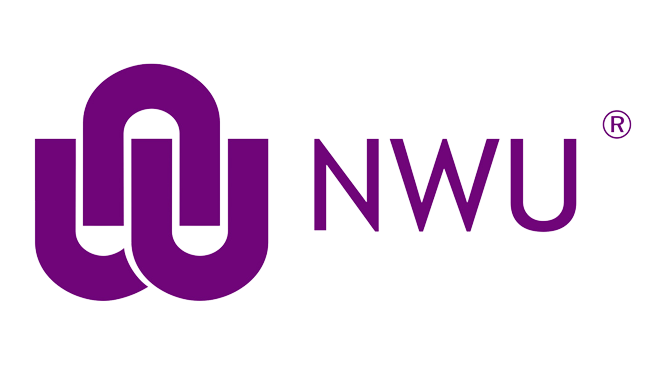

In [ ]:
# **CISM 623: Machine Learning**

# **Student Details**
*   # Student Name and Surname: Omphile O. Gopane
*   # University Number: 29658888


# Practical Lab 1

# CLASS: B.Sc Computer Science (HONS)

# DUE DATE: 22/ 07/ 2024 (Monday)


# Instructions: Answer all Questions


# **Problem Statement**
## The world population data spans from 1960 to 2017. We want to develop a prediction model that can provide the most accurate estimation of the current or historical population of a specific nation. Use the two CSV files to answer the questions.

# **Question 1**
## Create a function that accepts a **`country name`** as input and returns a dataframe with the `measured population` and the `year`.

In [ ]:
#import the neccessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Read the country and world population data
#fetches population and country data
countries_df = pd.read_csv('countries.csv')
world_pop_df = pd.read_csv('world_population.csv')

In [ ]:
#merges and selects the relevant columns to merge into one data frame
new_data_df = pd.concat([countries_df, world_pop_df], axis = 1 )
new_data_df.to_csv('merged.csv', index = False)

#reads and displays only the top 5 entries of the data frame
new_data_df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [ ]:
import pandas as pd

def year_population(name_of_country):
    #check if country is in new data frame
    if name_of_country in new_data_df['Country Name'].values:
        #return fetched relevant population data
        country_data = new_data_df[new_data_df['Country Name'] == name_of_country]

        # Reshape the dataframe for population data
        pop_data = country_data.melt(id_vars='Country Name', var_name='Year', value_name='Population')

        #returns dataframe that contains the country's population data by year of selected country
        return pop_data
    else:
        return f"Country '{name_of_country}' not found in the data."

In [ ]:
# Get user input
name_of_country = input("Enter country:")
#Call function to get population data
output_df = year_population(name_of_country)
#Display output
print(output_df)

Enter country: South Africa


    Country Name  Year  Population
0   South Africa  1960  17456855.0
1   South Africa  1961  17920673.0
2   South Africa  1962  18401608.0
3   South Africa  1963  18899275.0
4   South Africa  1964  19412975.0
5   South Africa  1965  19942303.0
6   South Africa  1966  20486439.0
7   South Africa  1967  21045785.0
8   South Africa  1968  21622590.0
9   South Africa  1969  22219897.0
10  South Africa  1970  22839451.0
11  South Africa  1971  23482813.0
12  South Africa  1972  24148137.0
13  South Africa  1973  24829693.0
14  South Africa  1974  25519604.0
15  South Africa  1975  26212405.0
16  South Africa  1976  26904349.0
17  South Africa  1977  27597297.0
18  South Africa  1978  28298150.0
19  South Africa  1979  29017049.0
20  South Africa  1980  29760471.0
21  South Africa  1981  30532954.0
22  South Africa  1982  31330259.0
23  South Africa  1983  32139708.0
24  South Africa  1984  32943584.0
25  South Africa  1985  33730148.0
26  South Africa  1986  34490419.0
27  South Africa  19

In [ ]:
# **Question 2**
## We must first divide our data into predictive features (X) and the target (y) before dividing it into training and testing.

## ----------------------------------------------------------------------------------------------------------------------------------------------

## Write a function that will take a dataframe as input `(Question 1)` and return four variables in the form of `(X_train, y_train), (X_test, y_test)` which you will use to train and evaluate your model
## ----------------------------------------------------------------------------------------------------------------------------------------------

## `test_size = 0.2` and `random_state = 42`.

_**Use the results in Question 1 as Inputs:**_
```python
data =year_population('South Africa')
data_split(data)
```
>

In [ ]:
# Separate features (X) and target variable (y)
def data_split(df):
    X = df.drop(columns=['Year', 'Country Name'])
    y = df['Year']

    # Split the data into training and testing sets using the specified test size and random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Return split data
    return (X_train, y_train), (X_test, y_test)

# Get population data for specified country
data = year_population('South Africa')

# Split the data into training and testing sets
(X_train, y_train), (X_test, y_test) = data_split(data)

In [ ]:
data_split(data)

((    Population
  36  42898520.0
  31  38437855.0
  8   21622590.0
  17  27597297.0
  6   20486439.0
  4   19412975.0
  41  46385006.0
  19  29017049.0
  30  37560525.0
  49  50970818.0
  50  51584663.0
  54  54539571.0
  15  26212405.0
  9   22219897.0
  27  35230249.0
  26  34490419.0
  16  26904349.0
  24  32943584.0
  33  40300161.0
  55  55291225.0
  40  45728315.0
  11  23482813.0
  32  39360225.0
  56  56015473.0
  43  47648727.0
  29  36740883.0
  53  53767396.0
  1   17920673.0
  21  30532954.0
  2   18401608.0
  45  48820586.0
  39  45058775.0
  35  42088165.0
  23  32139708.0
  47  49887181.0
  10  22839451.0
  22  31330259.0
  18  28298150.0
  57  56717156.0
  20  29760471.0
  7   21045785.0
  42  47026173.0
  14  25519604.0
  28  35970537.0
  51  52263516.0
  38  44372112.0,
  36    1996
  31    1991
  8     1968
  17    1977
  6     1966
  4     1964
  41    2001
  19    1979
  30    1990
  49    2009
  50    2010
  54    2014
  15    1975
  9     1969
  27    1987
  26 

In [ ]:
# **Question 3**
## Use the output from `data_split(df)` to fit a Linear regression model

In [ ]:
#Import necesssary libraries for plotting and visualization
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Prepare the data (redundant as this was done in Q2)
data = year_population('South Africa')
(X_train, y_train), (X_test, y_test) = data_split(data)

# Create regression model (L2 regularization)
linear_model = LinearRegression()
ridge_model = Ridge()

In [ ]:
# Fit models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
# Calculate R-squared values
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Linear Regression R-squared:", r2_linear)
print("Ridge Regression R-squared:", r2_ridge)

Linear Regression R-squared: 0.9972474287560555
Ridge Regression R-squared: 0.9972474287560555


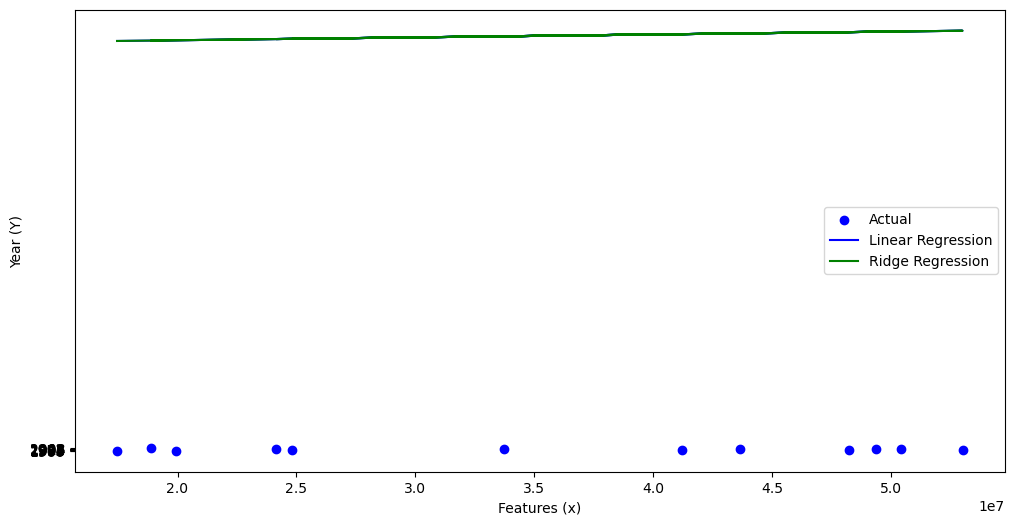

In [ ]:
# Plot actual vs. predicted for Ridge and linear regression
# Create the figure and axes
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Line plot of linear regression predictions (blue)
plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression')

# Line plot of ridge regression predictions (green)
plt.plot(X_test, y_pred_ridge, color='green', label='Ridge Regression')

# Add labels and mapping (key)
plt.xlabel('Features (x)')
plt.ylabel('Year (Y)')
plt.legend()

# Display plot
plt.show()

# **Question 4**
Test your model using the testing data that was produced in Question 2. To use the `mean square error` as your performance metric.

Write a function that accepts the `model` in Question 3, and the `test data set` in Question 2

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

def test_model(model, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    X_test = X_test.values.reshape(-1, 1)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [ ]:
# Get the data for specified country
data = year_population('South Africa')


# Split the data into training and testing sets
(X_train, y_train), (X_test, y_test) = data_split(data)


# Create the linear regression model
lm = LinearRegression()
lm =Ridge(1.0)

# Fit (train) the model on the training data
lm.fit(X_train, y_train)

# Evaluate the model and print the MSE
mse_scores = test_model(lm, X_test, y_test)
print(f"Mean Squared Error: {mse_scores}")

Mean Squared Error: 0.9351669650520287


C:\Users\NWUUSER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
